In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data=data.drop('Unnamed: 0',axis=1)

In [4]:
all_date=data.date.unique()

In [5]:
count=0
for i in range(8064):
    if data.date[i] in all_date[0:(len(all_date)-30)]:
        count=count+1
Training=data.loc[0:count,:]
Testing=data.loc[count:8064,:]

In [6]:
X_train=Training.drop(['X(t)','date'],axis=1)
y_traing=Training['X(t)']

X_test=Testing.drop(['X(t)','date'],axis=1)
y_test=Testing['X(t)']

** 1. Linear Regression **

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_traing)
y_pred=lr.predict(X_test)

In [ ]:
y_pred

In [8]:
from sklearn import metrics
lr.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.54681568758292376, 18.453365229893482)

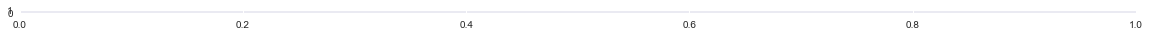

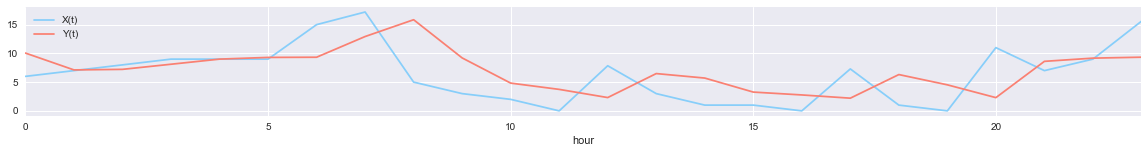

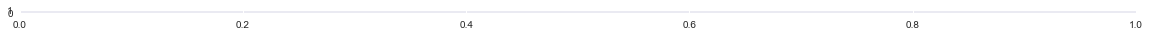

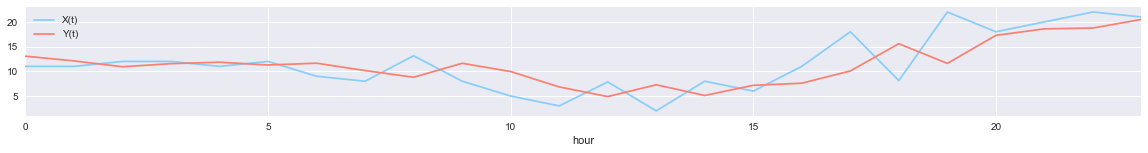

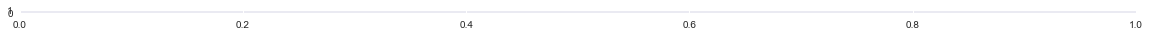

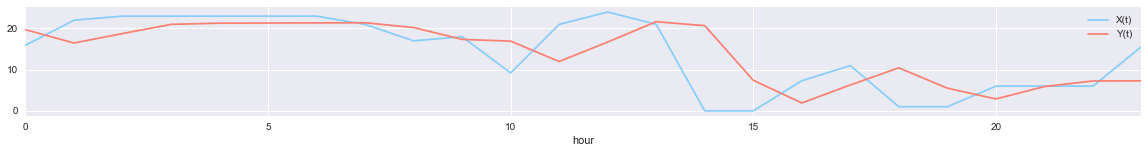

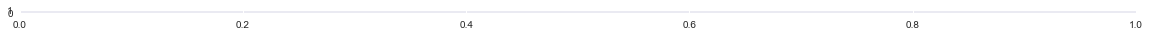

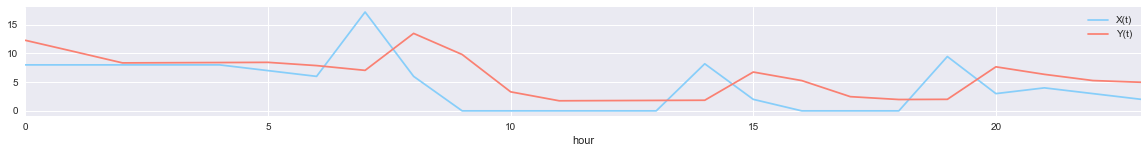

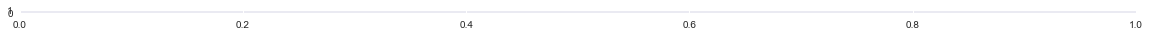

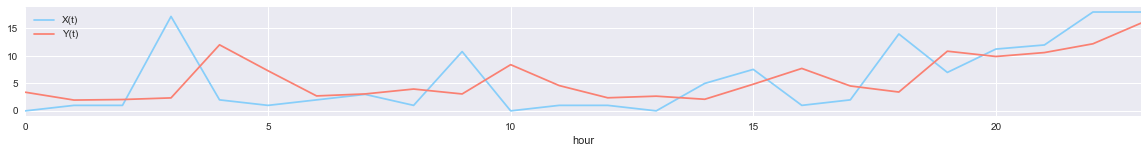

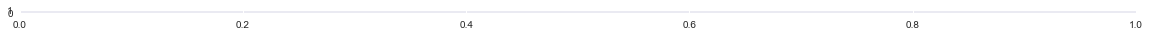

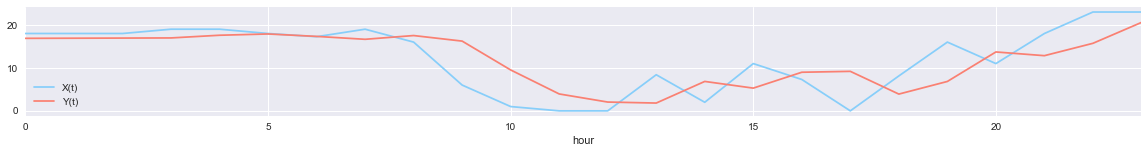

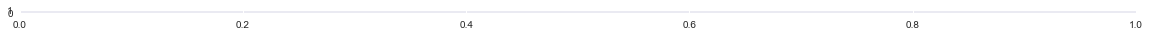

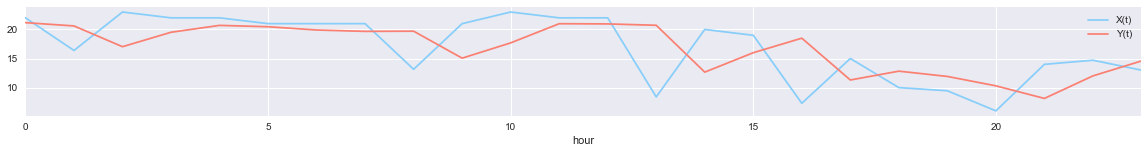

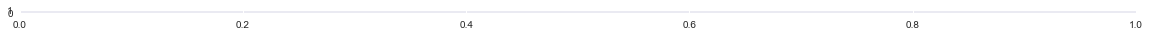

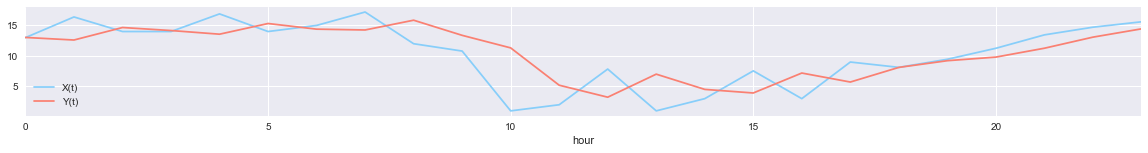

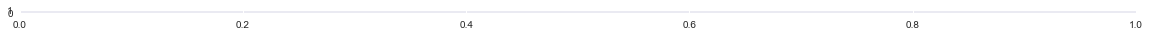

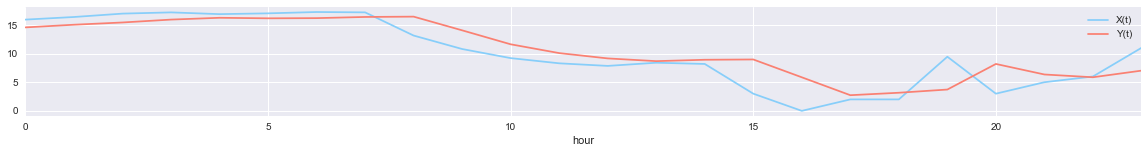

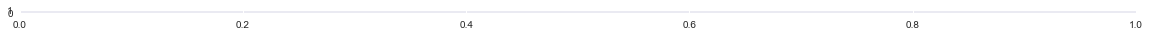

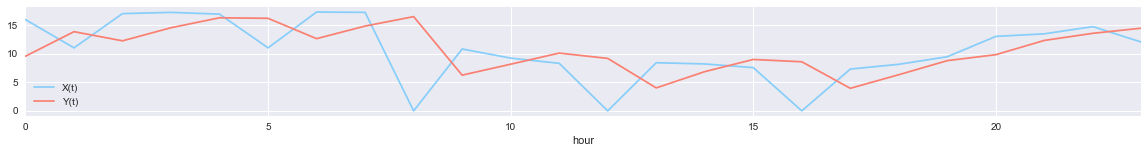

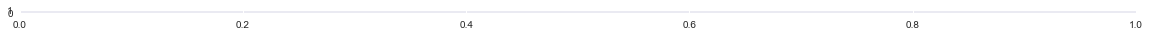

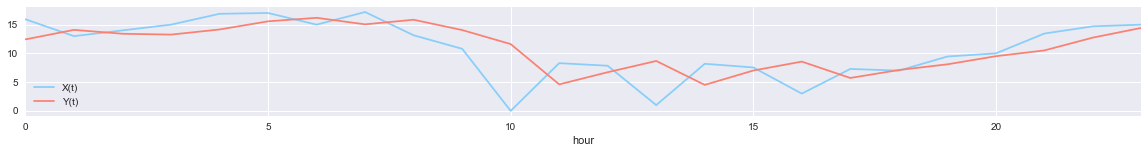

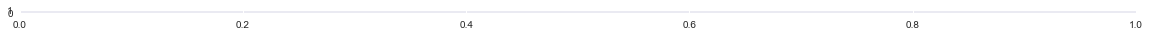

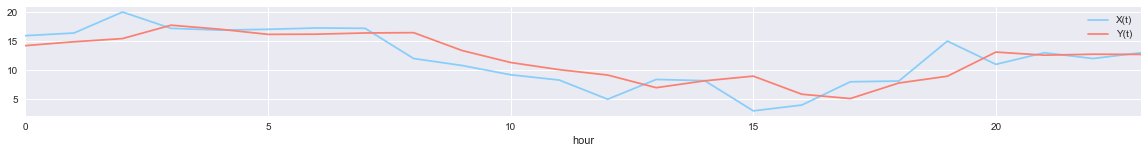

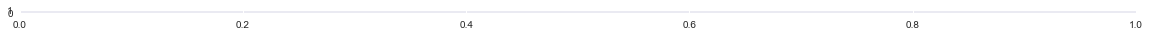

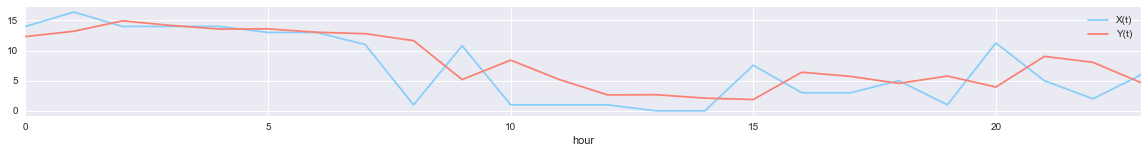

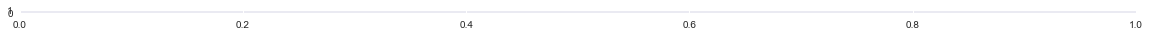

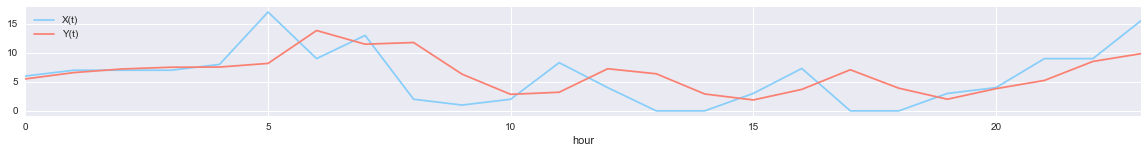

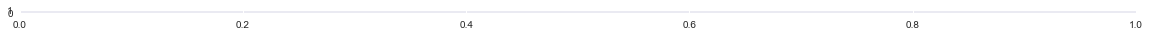

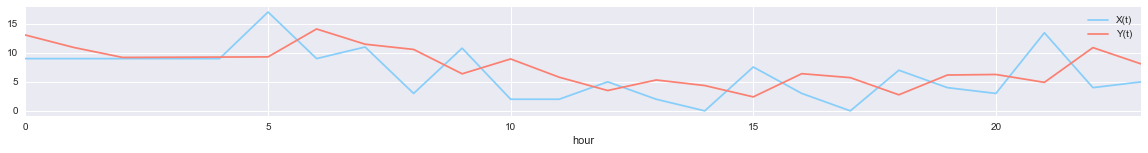

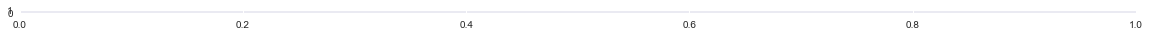

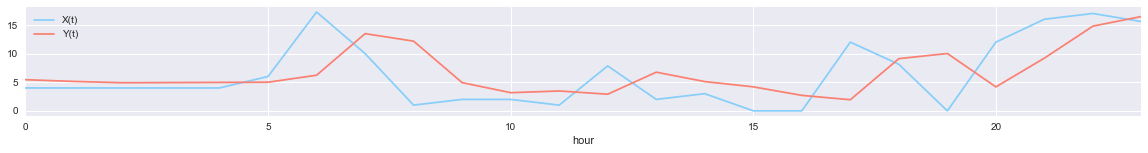

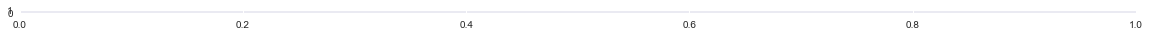

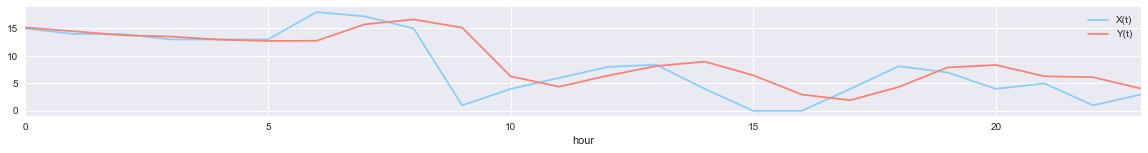

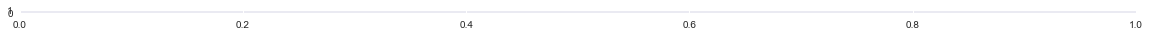

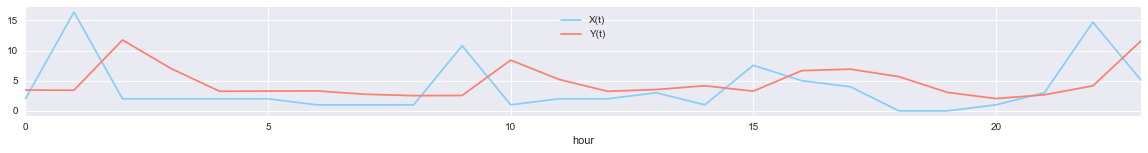

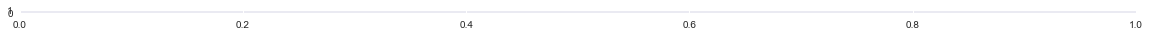

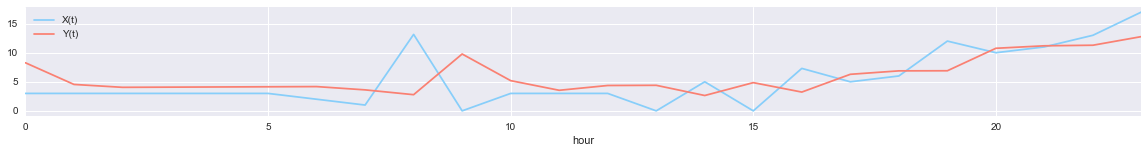

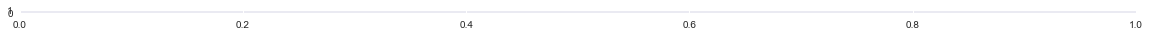

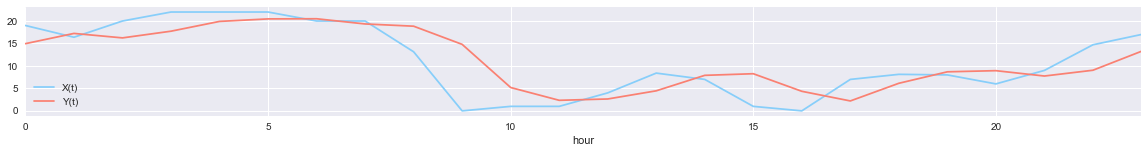

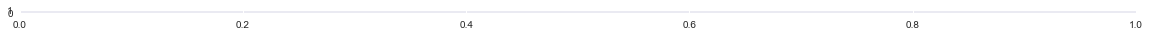

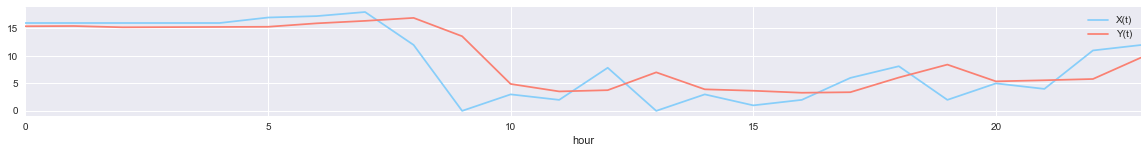

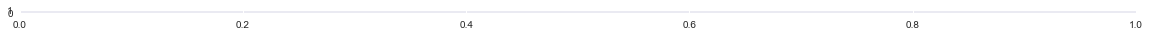

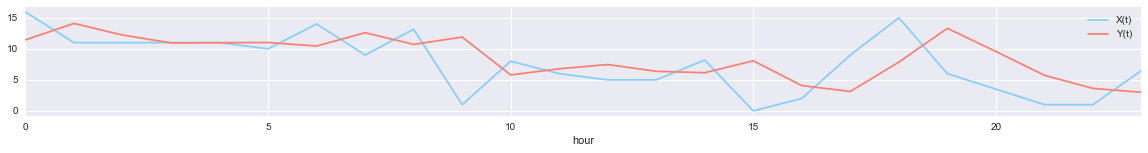

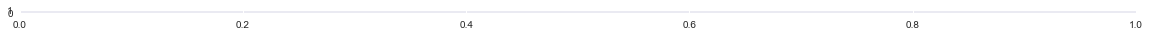

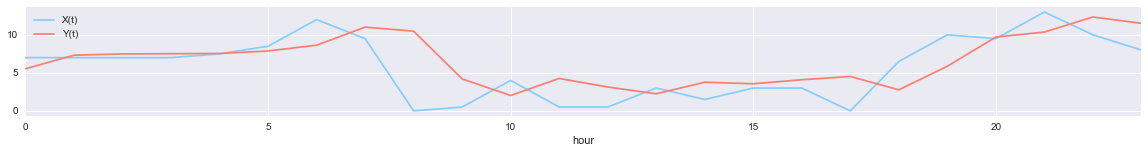

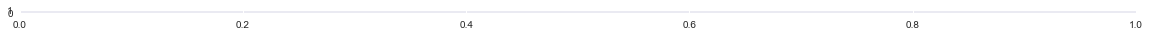

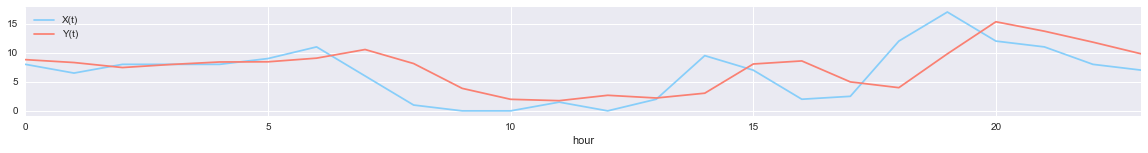

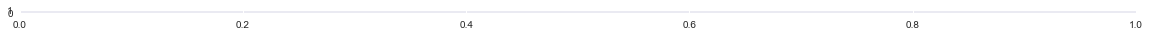

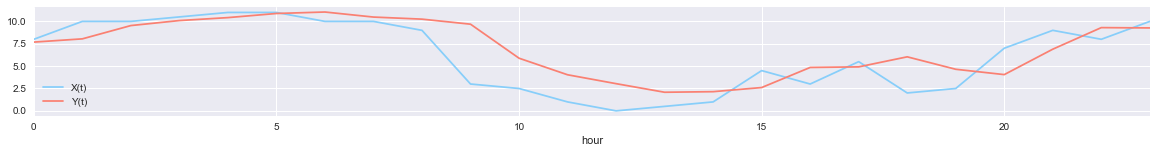

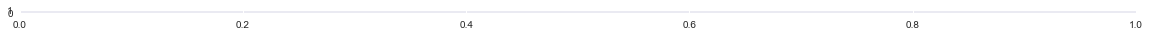

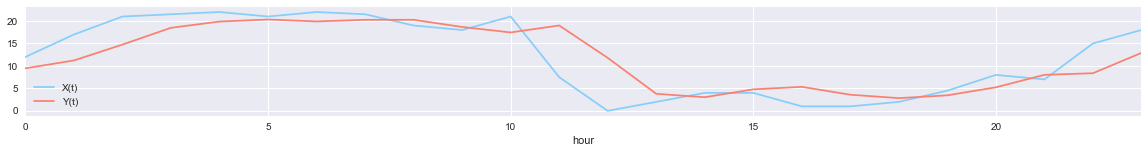

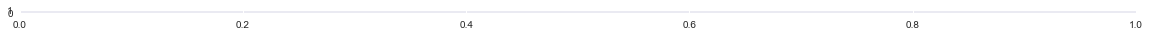

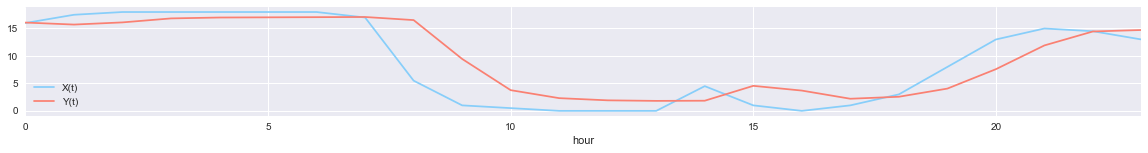

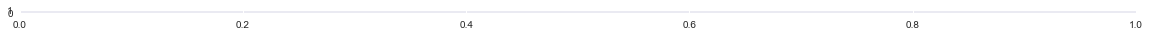

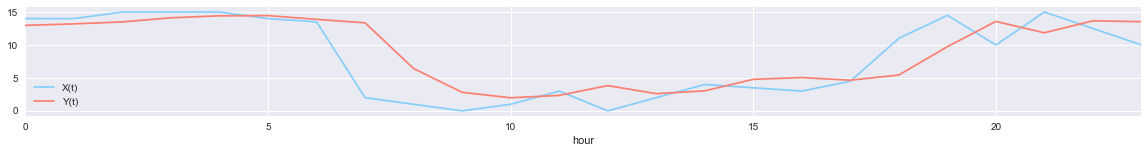

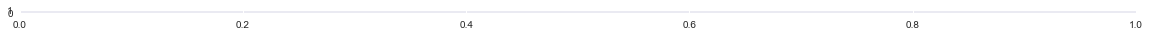

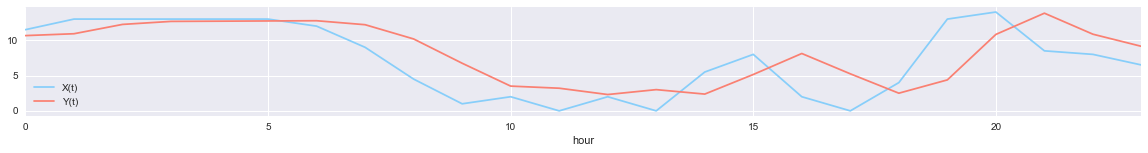

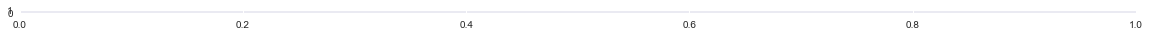

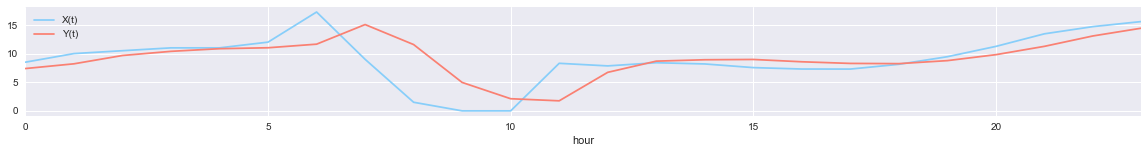

In [9]:
plt.rcParams['figure.figsize']=20,2
fignum=1
for i in range(len(all_date)-30,len(all_date)):
    curr_date=all_date[i]
    #plt.figure(1)
    plt.subplot(30,1,fignum)
    y_given=Testing.loc[Testing.date==curr_date,['hour','X(t)']]
    y_given=y_given.set_index('hour')
    ax=y_given.plot(color='lightskyblue')
    y_hat=y_pred[Testing.date==curr_date]
    y_hat=pd.DataFrame(y_hat,index=y_given.index,columns=['Y(t)'])
    y_hat.plot(color='salmon',ax=ax)
    plt.show()
    fignum=fignum+1

** 2. SVR **

In [9]:
from sklearn.svm import SVR
svm_lr=SVR(kernel='linear')
svm_lr.fit(X_train,y_traing)
y_pred=svm_lr.predict(X_test)
svm_lr.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.51908071853467763, 19.5827148112092)

In [ ]:
svm_pl=SVR(kernel='poly')
svm_pl.fit(X_train,y_traing)
y_pred=svm_pl.predict(X_test)
svm_pl.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

In [22]:
svm_pl=SVR(kernel='rbf')
svm_pl.fit(X_train,y_traing)
y_pred=svm_pl.predict(X_test)
svm_pl.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.55639616613604836, 18.063254484719977)

** 3. Regression Decision Tree **

In [11]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
redt=DecisionTreeRegressor(random_state=3)
redt.fit(X_train,y_traing)
y_pred=redt.predict(X_test)
redt.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.48526234172482818, 20.959776729848549)

** 4. Random Forest Regression **

In [17]:
from sklearn.ensemble import  RandomForestRegressor
rfrs=RandomForestRegressor(random_state=4)
rfrs.fit(X_train,y_traing)
y_pred=rfrs.predict(X_test)
rfrs.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.58922511409049749, 16.726481454149848)

** 5. Neural Network **

In [30]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=50,activation= 'tanh',random_state=5)
nn.fit(X_train,y_traing)
y_pred=nn.predict(X_test)
nn.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.59237967262104008, 16.598029918851331)